In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

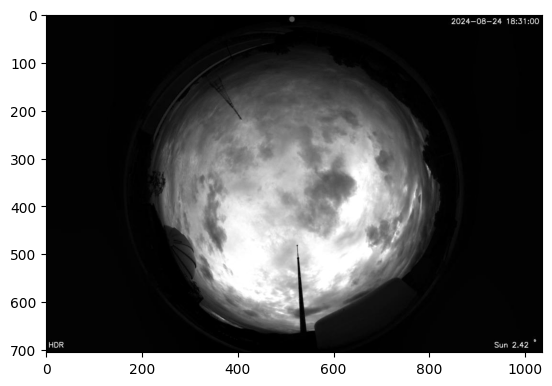

In [17]:
path = r'C:\Users\User\OneDrive - KMITL\Documents\NARIT_internship_date\Image_testing\638600958679970874.png'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=0.1, tileGridSize=(7,7))
clahe_image = clahe.apply(img)
plt.imshow(clahe_image,cmap='gray')

True

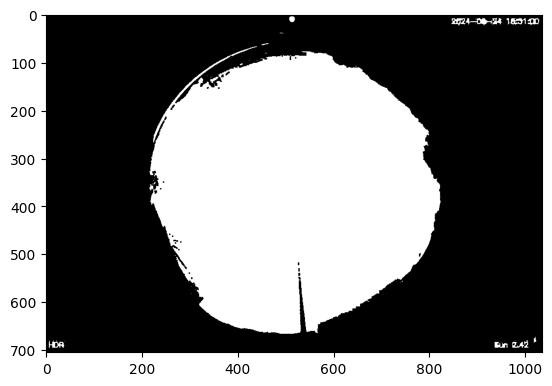

In [18]:
_,thresh = cv2.threshold(clahe_image,20,255,cv2.THRESH_BINARY)
kernel = np.array([
    [1, -1, 1],
    [1, -1, 1],
    [1, -1, 1]
])
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
dilated = cv2.dilate(thresh, kernel, iterations=1)
erosion = cv2.erode(dilated, kernel, iterations=1)
plt.imshow(erosion,cmap='gray')
cv2.imwrite('mask_new.png',erosion)